# RAG System Evaluation - Visualization & Analysis

## Overview
This notebook creates comprehensive visualizations for evaluating the multilingual RAG system performance across different LLM models and languages. It analyzes multiple evaluation metrics and provides insights into model performance.

## Key Metrics Analyzed
- **RAGAS Metrics**: Faithfulness, Answer Relevancy, Context Precision
- **BERTScore Metrics**: Precision, Recall, F1 Score for semantic similarity
- **Retriever Performance**: Semantic context precision across languages
- **Topic Clustering**: UMAP visualization of conversation topics

## Data Sources
- **RAGAS Results**: Comprehensive evaluation across 5 LLM models (Granite, Llama3, Mistral, Zephyr, WizardLM2)
- **Retriever Evaluation**: Semantic precision by language (German, French, Italian, English)
- **ChromaDB Embeddings**: Vector representations for topic visualization

## Visualizations Created
1. **Model Comparison**: Bar plots for faithfulness and answer relevance by language
2. **Semantic Quality**: Line plots for BERTScore F1 across models and languages
3. **Retriever Analysis**: Language-specific semantic precision performance
4. **SpiderPlot Charts**: Comprehensive model comparison across all metrics
5. **Topic Clustering**: UMAP visualization of conversation topics from vector store

## Technical Stack
- **Visualization**: Matplotlib, Seaborn with Viridis color palette
- **Data Processing**: Pandas, NumPy for metric aggregation
- **Dimensionality Reduction**: UMAP for embedding visualization
- **Vector Database**: ChromaDB for accessing stored embeddings

In [ ]:
# Import essential libraries for data analysis and visualization
import pandas as pd  # Data manipulation and analysis
import numpy as np   # Numerical operations and array handling
import matplotlib.pyplot as plt  # Base plotting library
import seaborn as sns  # Statistical data visualization with better aesthetics

# Set font family for professional-looking plots
plt.rcParams['font.family'] = 'Times New Roman'

In [ ]:
# Load evaluation datasets for comprehensive analysis
# RAGAS evaluation results containing all metrics across different LLM models
ragas_df = pd.read_excel(
    r"C:\Users\TAABASU5\OneDrive - Swisscom\Desktop\personal\UpGrad\MTech\code\notebooks\dataset\generated\evaluation_results\rag-evaluation-ALL.xlsx"
)

# Retriever evaluation results showing semantic context precision by language
retriever_df = pd.read_csv(
    r"c:\Users\TAABASU5\OneDrive - Swisscom\Desktop\personal\UpGrad\MTech\code\notebooks\dataset\generated\evaluation_results\RAG-Retriver-Evaluation_semantic_context_precision_results_by_language.csv"
)

In [ ]:
# Clean retriever evaluation data for proper visualization
# Remove rows with missing language or precision values
retriever_df = retriever_df.dropna(subset=['language', 'semantic-context-precision'])

# Ensure precision values are numeric for proper plotting
retriever_df['semantic-context-precision'] = retriever_df['semantic-context-precision'].astype(float)

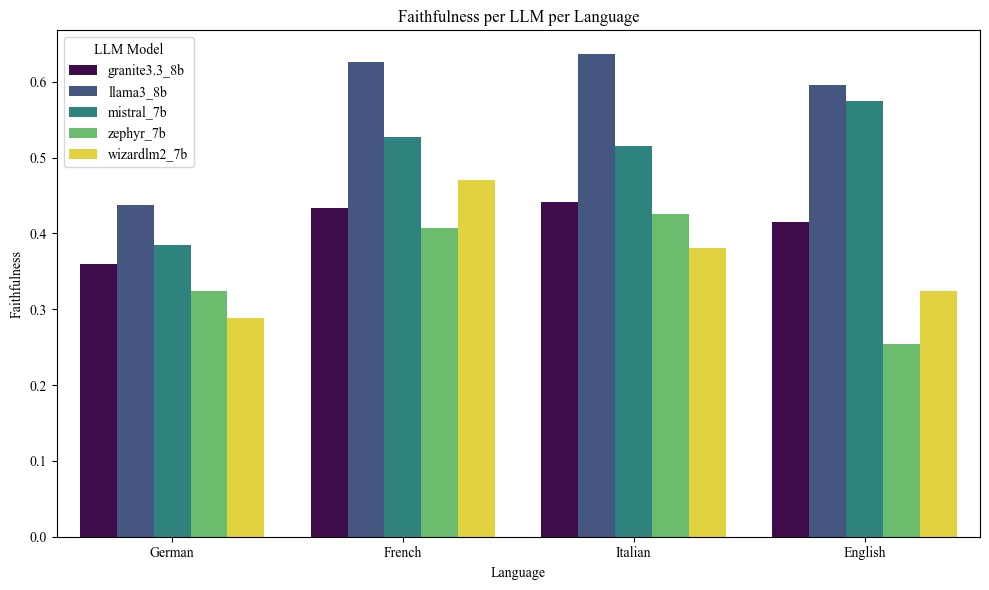

In [ ]:
# Create bar plot showing faithfulness scores across LLMs and languages
# Faithfulness measures how well the generated answer aligns with the retrieved context
plt.figure(figsize=(10,6))

# Use Viridis colormap for consistent and accessible color scheme
models = ragas_df['model'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(models)))

# Create grouped bar plot comparing models across languages
sns.barplot(
    data=ragas_df,
    x='language', y='ragas_faithfulness', hue='model', 
    palette=dict(zip(models, colors))
)

plt.title('Faithfulness per LLM per Language')
plt.ylabel('Faithfulness')
plt.xlabel('Language')
plt.legend(title='LLM Model')
plt.tight_layout()
plt.show()

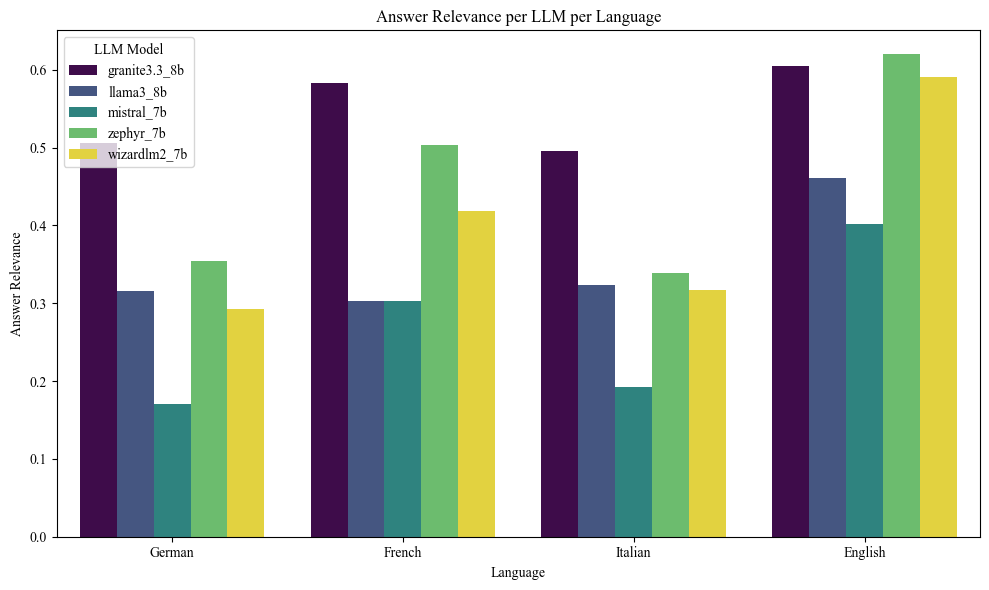

In [ ]:
# Create bar plot showing answer relevance scores across LLMs and languages
# Answer relevance measures how well the generated answer addresses the original question
plt.figure(figsize=(10,6))

# Use consistent Viridis color scheme across all visualizations
models = ragas_df['model'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(models)))

# Create grouped bar plot for answer relevance comparison
sns.barplot(
    data=ragas_df,
    x='language', y='ragas_answer_relevancy', hue='model', 
    palette=dict(zip(models, colors))
)

plt.title('Answer Relevance per LLM per Language')
plt.ylabel('Answer Relevance')
plt.xlabel('Language')
plt.legend(title='LLM Model')
plt.tight_layout()
plt.show()

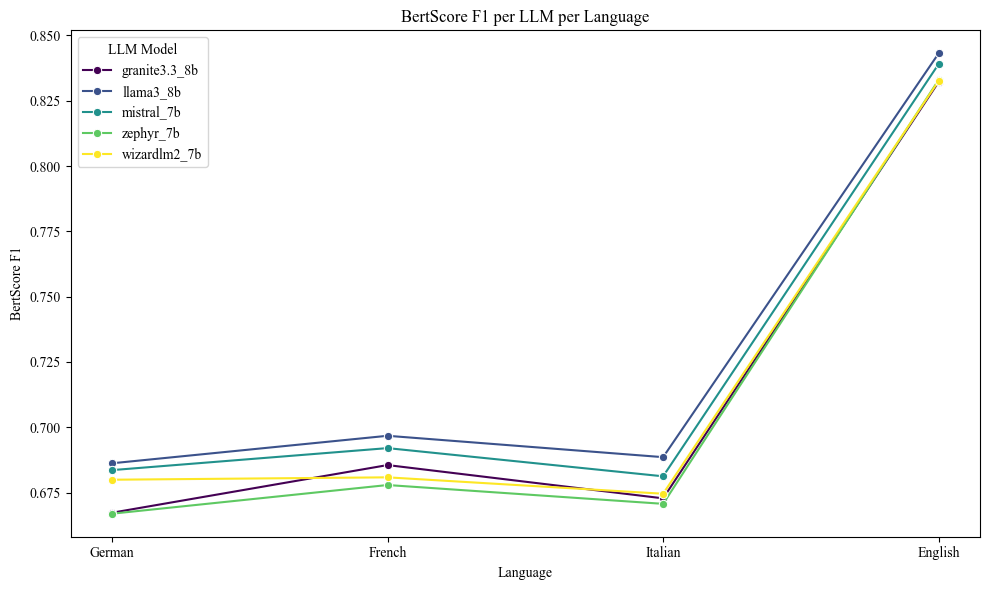

In [ ]:
# Create line plot showing BERTScore F1 performance across models and languages
plt.figure(figsize=(10,6))

# Apply Viridis color palette for consistency
models = ragas_df['model'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(models)))
sns.set_palette(sns.color_palette([colors[i] for i in range(len(models))]))

# Use line plot to show trends across languages for each model
sns.lineplot(
    data=ragas_df,
    x='language', y='bertscore_f1', hue='model', marker='o'
)

plt.title('BertScore F1 per LLM per Language')
plt.ylabel('BertScore F1')
plt.xlabel('Language')
plt.legend(title='LLM Model')
plt.tight_layout()
plt.show()

C:\Users\TAABASU5\AppData\Local\Temp\ipykernel_33632\4068988362.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


(0.0, 1.0)

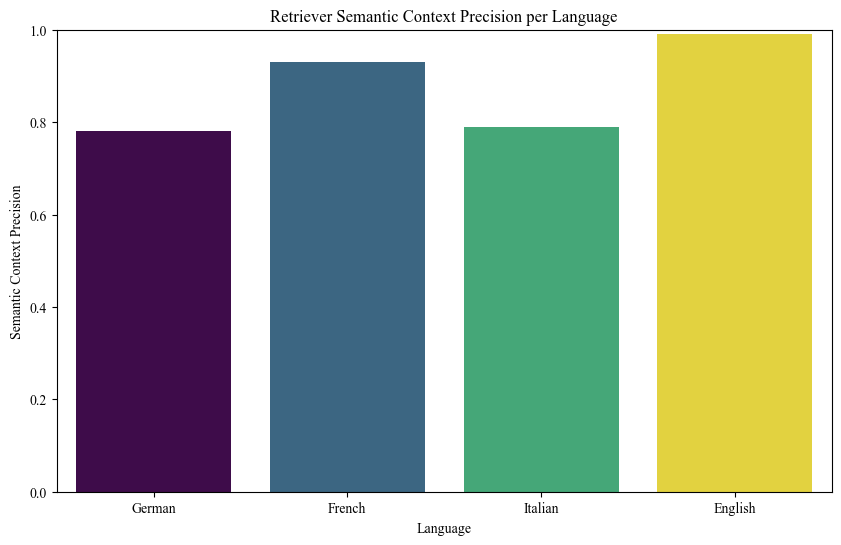

In [ ]:
# Create bar plot showing retriever semantic context precision by language
plt.figure(figsize=(10,6))

# Use Viridis colors for language differentiation
languages = retriever_df['language'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(languages)))

# Create bar plot for retriever performance across languages
sns.barplot(
    data=retriever_df,
    x='language', y='semantic-context-precision',
    palette=dict(zip(languages, colors))
)

plt.title('Retriever Semantic Context Precision per Language')
plt.ylabel('Semantic Context Precision')
plt.xlabel('Language')
plt.ylim(0, 1)  # Set y-axis limit for better comparison

In [ ]:

# Aggregate (average) all metrics across languages for each model
agg = ragas_df.groupby('model').mean(numeric_only=True).reset_index()

# Define key evaluation metrics for comprehensive model comparison
metrics = [
    'bertscore_precision',    # Semantic precision from BERT embeddings
    'bertscore_recall',       # Semantic recall from BERT embeddings
    'bertscore_f1',          # Harmonic mean of precision and recall
    'ragas_faithfulness',    # Alignment with retrieved context
    'ragas_answer_relevancy', # Relevance to original question
    'ragas_context_precision' # Quality of retrieved context
]

# Select only model name and metrics for radar plot
agg = agg[['model'] + metrics]

# Set up angles for radar plot (one for each metric)
num_vars = len(metrics)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the circular plot

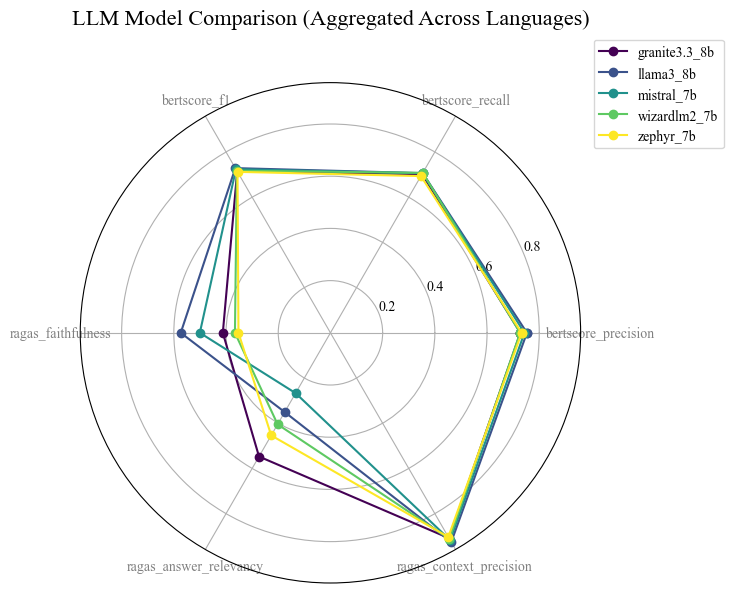

In [ ]:
# Create comprehensive radar plot comparing all models across all metrics
plt.figure(figsize=(10,6))

# Use Viridis colormap for model differentiation
colors = plt.cm.viridis(np.linspace(0, 1, len(agg)))

# Plot each model as a separate line on the radar chart
for i, (idx, row) in enumerate(agg.iterrows()):
    values = row[metrics].tolist()
    values += values[:1]  # Complete the circular plot
    plt.polar(angles, values, marker='o', label=row['model'], color=colors[i])

# Add metric labels at each angle position
plt.xticks(angles[:-1], metrics, color='grey', size=10)
plt.title('LLM Model Comparison (Aggregated Across Languages)', size=16, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()

c:\Users\TAABASU5\OneDrive - Swisscom\Desktop\personal\UpGrad\MTech\code\notebooks\venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


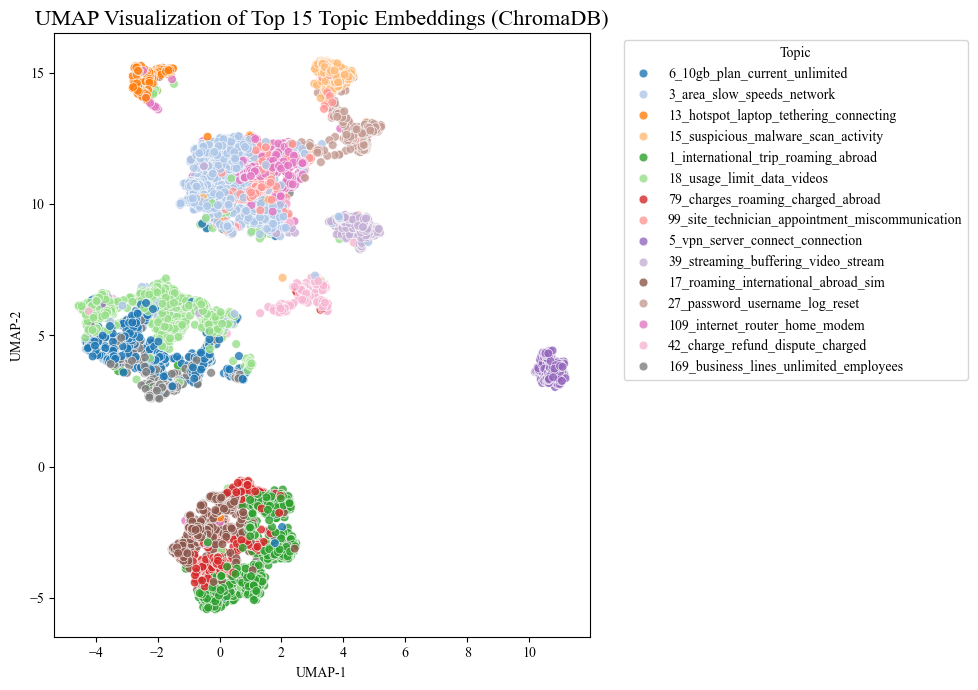

In [ ]:
# Create UMAP visualization of conversation topics from ChromaDB vector store

import chromadb
from chromadb.config import Settings
import pandas as pd
import numpy as np
import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the persistent ChromaDB instance containing conversation embeddings
chroma_client = chromadb.PersistentClient(
    path=r"C:\Users\TAABASU5\OneDrive - Swisscom\Desktop\personal\UpGrad\MTech\code\notebooks\dataset\generated\chromadb"
)

# Access the telecom conversation vector store
collection = chroma_client.get_collection(name='telecom_vector_store')

# Retrieve all embeddings and metadata from the vector store
results = collection.get(include=['embeddings', 'metadatas'])

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(results['metadatas'])
df['embedding'] = list(results['embeddings'])

# Focus on top 15 most frequent topics for clearer visualization
top_topics = df['topic_label'].value_counts().nlargest(15).index
filtered = df[df['topic_label'].isin(top_topics)].copy()

# Prepare data for UMAP dimensionality reduction
embeddings = np.vstack(filtered['embedding'].values)  # Stack embeddings into matrix
topic_labels = filtered['topic_label'].values        # Extract topic labels

# Apply UMAP to reduce 1024-dimensional embeddings to 2D for visualization
umap_model = umap.UMAP(random_state=42)
umap_embeddings = umap_model.fit_transform(embeddings)

# Create scatter plot showing topic clusters in 2D space
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=umap_embeddings[:, 0],
    y=umap_embeddings[:, 1],
    hue=topic_labels,
    palette='tab20',    # Use tab20 palette for topic differentiation
    s=40,              # Point size
    alpha=0.8          # Transparency for overlapping points
)

plt.title('UMAP Visualization of Top 15 Topic Embeddings (ChromaDB)', fontsize=16)
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')
plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()